In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

 99% 1.97G/1.98G [00:20<00:00, 134MB/s]
100% 1.98G/1.98G [00:20<00:00, 102MB/s]


In [9]:
! unzip emotion-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Sad/0a12a7e998fa7abde73e79ce2a74477bdc6f5dd010da05231f4c3330.jpg  
  inflating: dataset/Sad/0a1370fc7e34586d5f134694c9d1e79ed4cce9e59684077ae5061db8.png  
  inflating: dataset/Sad/0a14abb2a25753914205e88e870054918de36219552002f3144b8455.jpg  
  inflating: dataset/Sad/0a15eede4e05e13f70f6540c4167282f9a488cc318005c8693c49433.jpg  
  inflating: dataset/Sad/0a163aa46984ad37b58aa6b8175dca9b1007a3066099d18f4dda6f78.jpg  
  inflating: dataset/Sad/0a1833eb2427bd8c1ddd3b9c020c6233a3671763e21b1e08b5afa41f.jpg  
  inflating: dataset/Sad/0a19842e87935fbd2c45a7042e4bb8d1d3816476e8a6b7e8f41205d8.jpg  
  inflating: dataset/Sad/0a1d613237e9af295213c61e1c2b9d7fd211fad638c522afb9548901.jpg  
  inflating: dataset/Sad/0a1d86074a08f9bf55858cf90eaaee6f1e0362d97f08cbaa161e30e0.jpg  
  inflating: dataset/Sad/0a22b8d3b2fbcbebb6a4be7dad0a37b92983e8afe42b4d48cded4e45.jpg  
  inflating: dataset/Sad/0a285a2a07f0f8daaa0a821e30ad2e558ddc18f2589a

In [10]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 746.6 kB/s eta 0:00:00


In [11]:
!pip install git+https://github.com/yaledhlab/vggface.git

  Cloning https://github.com/yaledhlab/vggface.git to /tmp/pip-req-build-r63ynto9
  Running command git clone --filter=blob:none --quiet https://github.com/yaledhlab/vggface.git /tmp/pip-req-build-r63ynto9
  Resolved https://github.com/yaledhlab/vggface.git to commit b76539b7588bca69b0030ad7e4f985f877dc7c0a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8332 sha256=9c396e6222ab3ff0f2f58c280c53cd05ed67e308e96fda104ab7b77e124f6f32
  Stored in directory: /tmp/pip-ephem-wheel-cache-yh70aghs/wheels/79/35/65/07a23ffb182ac2ec3a43776e08b2cf52daf0ce54da686eefbe
Successfully built keras-vggface


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from keras_vggface.vggface import VGGFace
from keras.models import  Model
from keras.layers import Input,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation,RandomZoom,Rescaling,RandomWidth,RandomHeight,RandomFlip,RandomTranslation

In [13]:
BATCH_SIZE = 64
IMG_SIZE = (224, 224)
directory = "dataset/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 15453 files belonging to 6 classes.
Using 12363 files for training.
Found 15453 files belonging to 6 classes.
Using 3090 files for validation.


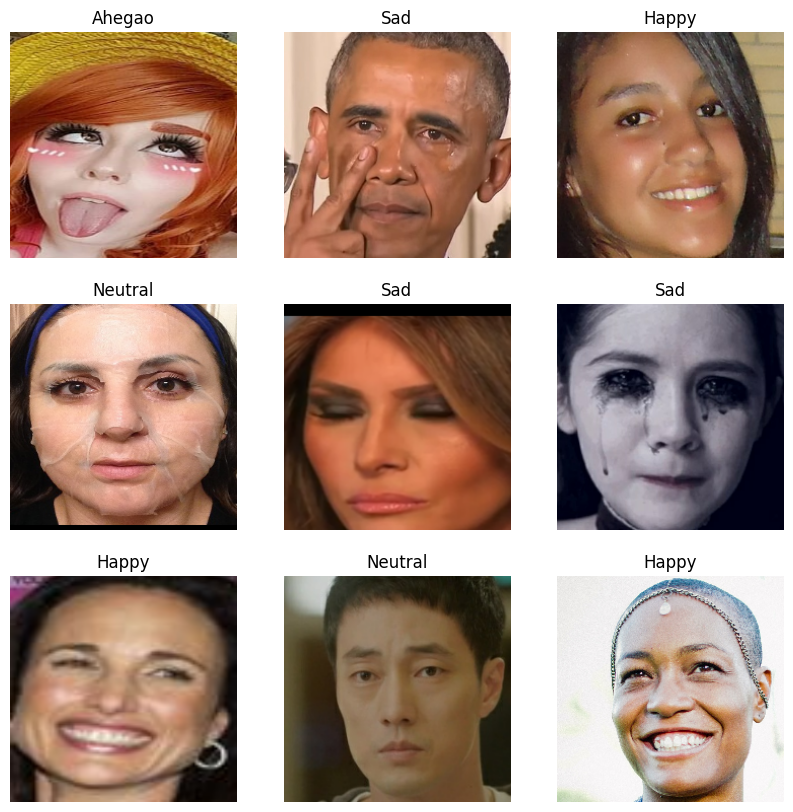

In [14]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

##Downloading and Analyzing VGG-Face and Resnet50

In [16]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model2 = VGGFace(include_top=True, input_shape=IMG_SHAPE,pooling='avg')

580075520/580070376 [==============================] - 6s 0us/step


In [17]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model=ResNet50(weights='imagenet', include_top=True, input_shape=IMG_SHAPE)

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
base_model2.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_16[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

fc2
predictions


In [ ]:
nb_layers = len(base_model2.layers)
print(base_model2.layers[nb_layers - 2].name)
print(base_model2.layers[nb_layers - 1].name)

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1000)


In [ ]:
base_model.trainable = False
image_var = tf.Variable(image_batch)
pred = base_model2.predict(image_var)
decoded_predictions = tf.keras.applications.vgg16.decode_predictions(pred, top=3)[0]

35363/35363 [==============================] - 0s 0us/step


In [ ]:
decoded_predictions

[('n02808440', 'bathtub', 0.10433698),
 ('n03916031', 'perfume', 0.08803743),
 ('n04493381', 'tub', 0.07219393)]

##Data Augmentation

In [23]:
def data_augmenter():
    data_augmentation=tf.keras.Sequential()
    data_augmentation.add(RandomRotation(0.2))
    data_augmentation.add(RandomZoom(0.2))
    # data_augmentation.add(Rescaling(1./255))
    # data_augmentation.add(RandomWidth(0.2))
    # data_augmentation.add(RandomHeight(0.2))
    data_augmentation.add(RandomFlip("horizontal"))
    data_augmentation.add(RandomTranslation(0.2, 0.2, fill_mode='nearest'))
    return data_augmentation


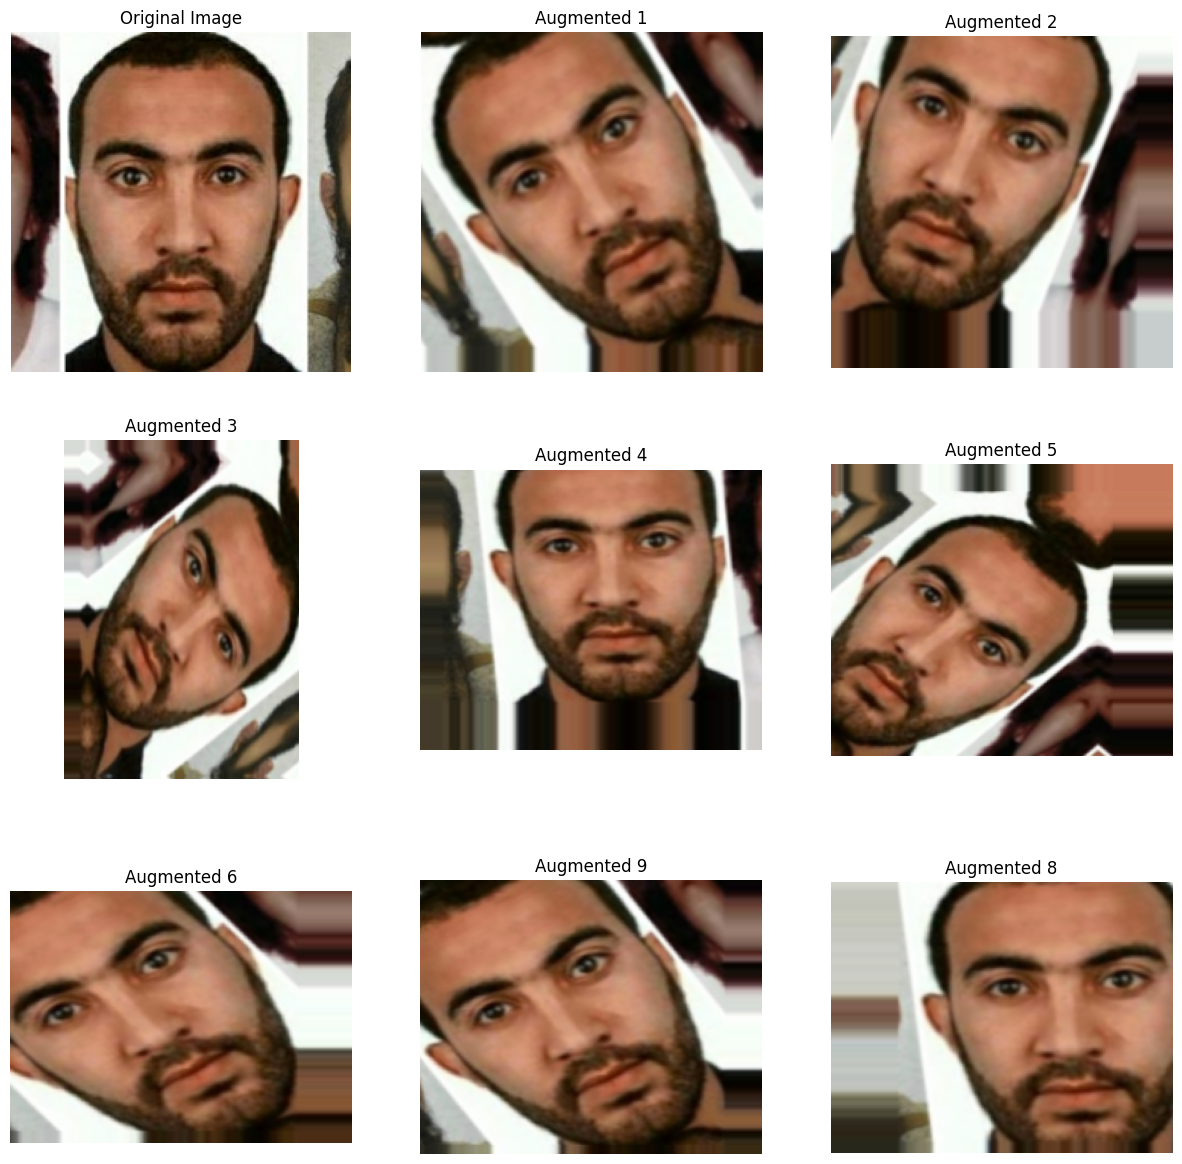

In [ ]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(15, 15))

    plt.subplot(3, 3, 1)
    plt.imshow(image[0].numpy()/255)
    plt.title('Original Image')
    plt.axis('off')

    for i in range(9):
        ax = plt.subplot(3, 3, i + 2 if i < 8 else i)
        augmented_image = data_augmentation(tf.expand_dims(image[0], 0))
        plt.imshow(tf.squeeze(augmented_image[0] ))
        plt.title(f'Augmented {i + 1}')
        plt.axis('off')

##VGG-Face

In [82]:
def vggface(image_size=IMG_SIZE,classes=len(class_names),data_augmentation=data_augmenter1()):


  input_shape=image_size+(3,)
  hidden_dim = 512


  base_model = VGGFace(weights=None, include_top=False, input_shape=input_shape)
  base_model.trainable=False

  inputs=tf.keras.Input(shape=input_shape)

  x=data_augmentation(inputs)
  x=tf.keras.applications.vgg16.preprocess_input(x)

  x=base_model(x,training=False)

  x=tfl.GlobalAveragePooling2D()(x)
  x = Dense(hidden_dim, activation='relu', name='fc6')(x)
  x = Dense(hidden_dim, activation='relu', name='fc7')(x)

  outputs=Dense(classes,activation='softmax')(x)

  model=Model(inputs,outputs)

  return model


In [79]:
model2=vggface()

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 100
history2 = model2.fit(train_dataset, validation_data=validation_dataset, epochs=epochs,batch_size=BATCH_SIZE)

Epoch 1/100
194/194 [==============================] - 81s 395ms/step - loss: 1.6565 - accuracy: 0.2688 - val_loss: 1.6424 - val_accuracy: 0.2709
Epoch 2/100
194/194 [==============================] - 77s 388ms/step - loss: 1.6202 - accuracy: 0.2892 - val_loss: 1.6166 - val_accuracy: 0.2819
Epoch 3/100
194/194 [==============================] - 75s 379ms/step - loss: 1.6082 - accuracy: 0.2986 - val_loss: 1.6131 - val_accuracy: 0.2841
Epoch 4/100
194/194 [==============================] - 79s 393ms/step - loss: 1.6024 - accuracy: 0.3085 - val_loss: 1.5928 - val_accuracy: 0.2964
Epoch 5/100
194/194 [==============================] - 77s 389ms/step - loss: 1.5920 - accuracy: 0.3168 - val_loss: 1.5831 - val_accuracy: 0.3068
Epoch 6/100
194/194 [==============================] - 80s 397ms/step - loss: 1.5841 - accuracy: 0.3221 - val_loss: 1.5643 - val_accuracy: 0.3074
Epoch 7/100
194/194 [==============================] - 75s 379ms/step - loss: 1.5745 - accuracy: 0.3246 - val_loss: 1.5726 -

##Resnet50

In [25]:
def resnet50(image_size=IMG_SIZE,classes=len(class_names),data_augmentation=data_augmenter()):
  input_shape=image_size+(3,)

  fine_tune_at=140 #block4 conv1

  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable=False

  inputs=tf.keras.Input(shape=input_shape)

  x=data_augmentation(inputs)
  x=tf.keras.applications.vgg16.preprocess_input(x)

  x=base_model(x,training=False)

  x=tfl.GlobalAveragePooling2D()(x)
  x=tfl.Dropout(0.2)(x)

  prediction_layer=tfl.Dense(classes,activation='softmax')

  outputs=prediction_layer(x)

  model=tf.keras.Model(inputs,outputs)

  return model


In [27]:
model=resnet50()

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
epochs = 100
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs,batch_size=BATCH_SIZE)

Epoch 1/100
194/194 [==============================] - 99s 442ms/step - loss: 1.4210 - accuracy: 0.4619 - val_loss: 0.9281 - val_accuracy: 0.6272
Epoch 2/100
194/194 [==============================] - 84s 422ms/step - loss: 0.9081 - accuracy: 0.6422 - val_loss: 0.7892 - val_accuracy: 0.6657
Epoch 3/100
194/194 [==============================] - 80s 401ms/step - loss: 0.7740 - accuracy: 0.6972 - val_loss: 0.6733 - val_accuracy: 0.7239
Epoch 4/100
194/194 [==============================] - 81s 404ms/step - loss: 0.6939 - accuracy: 0.7275 - val_loss: 0.6136 - val_accuracy: 0.7566
Epoch 5/100
194/194 [==============================] - 80s 403ms/step - loss: 0.6738 - accuracy: 0.7334 - val_loss: 0.6469 - val_accuracy: 0.7401
Epoch 6/100
194/194 [==============================] - 80s 404ms/step - loss: 0.6305 - accuracy: 0.7508 - val_loss: 0.6023 - val_accuracy: 0.7751
Epoch 7/100
194/194 [==============================] - 80s 403ms/step - loss: 0.6023 - accuracy: 0.7636 - val_loss: 0.6357 -

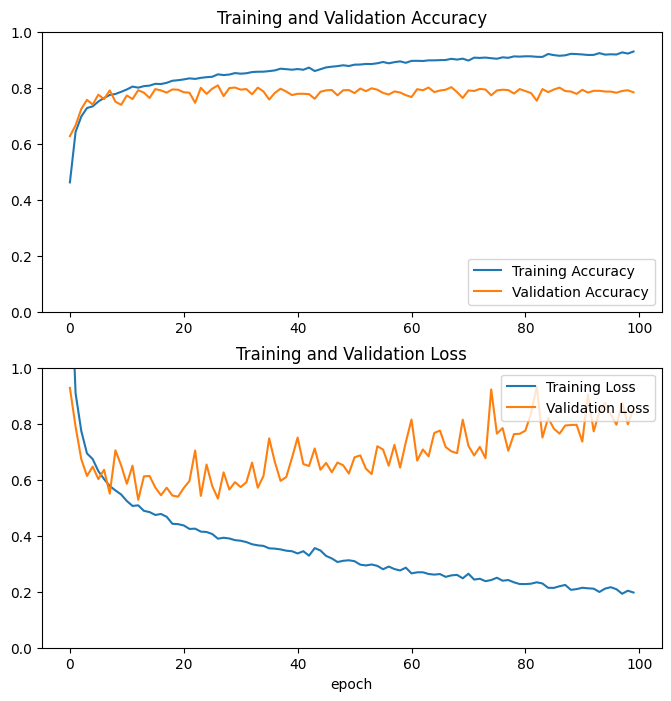

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [43]:
model.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
